In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="ticks", color_codes=True)
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
file = 'datasets/listings.csv'
df = pd.read_csv(file)
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.753560,-73.985590,Entire home/apt,150,30,48,2019-11-04,0.34,3,341
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Bedford-Stuyvesant,40.684940,-73.957650,Entire home/apt,75,1,408,2021-06-29,5.09,1,212
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.685350,-73.955120,Private room,60,30,50,2016-06-05,0.55,1,365
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.662650,-73.994540,Entire home/apt,275,5,1,2014-01-02,0.01,1,184
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.764570,-73.983170,Private room,61,2,485,2021-07-18,3.63,1,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36719,51447515,Gorgeous 2 Bedroom - in Prime Midtown East,51589519,Asi,Manhattan,Midtown,40.755787,-73.965126,Entire home/apt,255,31,0,NaN,NaN,6,364
36720,51449962,"Charming UWS 1-bdrm, 1-office, 1/2 block to Ct...",2971741,Dina Marie,Manhattan,Upper West Side,40.787029,-73.969239,Entire home/apt,306,5,0,NaN,NaN,1,16
36721,51450816,The Hunter IIII,61391963,Stay With Vibe,Manhattan,Upper East Side,40.768950,-73.960455,Entire home/apt,63,30,0,NaN,NaN,96,334
36722,51451029,Rockaway Beach Surf Getaway,10123226,Chase,Queens,Arverne,40.599257,-73.797953,Private room,75,1,0,NaN,NaN,1,87


In [3]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [4]:
df.isnull().sum()

id                                   0
name                                13
host_id                              0
host_name                           23
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       9415
reviews_per_month                 9415
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [5]:
df.fillna({'reviews_per_month':0}, inplace=True)
df.fillna({'name':'noname'}, inplace=True)
df.fillna({'host_name':'noname'}, inplace=True)
df.fillna({'last_review':'noreviews'}, inplace=True)

In [6]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [7]:
 df['price'].describe()

count    36724.000000
mean       160.109057
std        293.888431
min          0.000000
25%         67.000000
50%        108.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

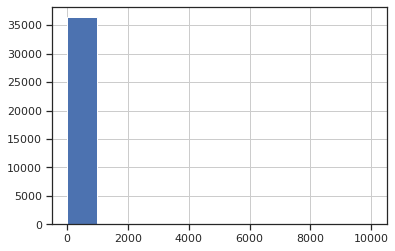

In [8]:
hist_price = df['price'].hist()

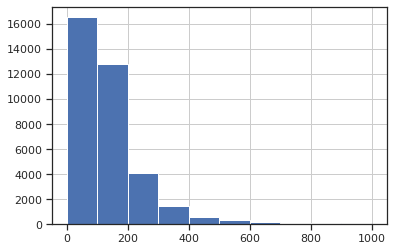

In [9]:
hist_price = df['price'][df.price < 1000].hist()

In [10]:
df[df.price > 1000]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
299,174966,Luxury 2Bed/2.5Bath Central Park View,836168,Henry,Manhattan,Upper West Side,40.775100,-73.985950,Entire home/apt,2500,30,26,2016-01-20,0.22,10,364
668,468613,$1300 5/14 - 6/1 - 3 weeks - room f,2325861,Cynthia,Manhattan,Lower East Side,40.721520,-73.992790,Private room,1300,30,0,noreviews,0.00,1,0
892,664047,Lux 2Bed/2.5Bath Central Park Views,836168,Henry,Manhattan,Upper West Side,40.774930,-73.987320,Entire home/apt,2500,30,59,2016-01-28,0.58,10,364
1202,893413,Architecturally Stunning Former Synagogue!,4751930,Martin,Manhattan,East Village,40.726940,-73.981730,Entire home/apt,2536,30,28,2021-05-24,0.34,1,58
1512,1301321,West Village Penthouse-terrace/view,2214774,Ben And Jess,Manhattan,West Village,40.734240,-74.005320,Entire home/apt,1899,30,18,2015-10-09,0.20,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35984,50973523,Luxurious Villa in New York,243197643,Ayaz,Queens,Whitestone,40.789050,-73.817650,Entire home/apt,1120,30,0,noreviews,0.00,1,179
36187,51101602,Starlit Theater Luxury Event Space Townhouse,301831302,Peter,Manhattan,Harlem,40.829590,-73.943000,Entire home/apt,1777,1,0,noreviews,0.00,10,180
36400,51246503,Entire 3 floors of the infamous KutKave!,39399272,Knight,Brooklyn,Bushwick,40.690576,-73.914960,Entire home/apt,2666,1,0,noreviews,0.00,8,80
36478,51291894,Near Times Square1,412378045,Jacqueline J,Manhattan,Financial District,40.708623,-74.007927,Entire home/apt,1011,1,0,noreviews,0.00,1,365


In [11]:
df_ex = df[df.price >= 1000] # all the expensive listings, which is skewing the dataset
df = df[df.price < 1000] # will now be the main dataset

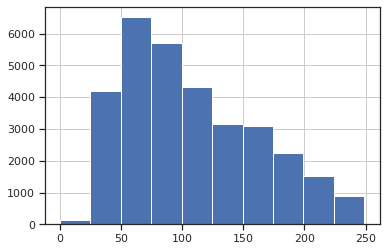

In [12]:
hist_price = df['price'][df.price < 250].hist()

In [13]:
df_ex2 = df[df.price >= 250]
df = df[df.price < 250]
df['price'].describe()

count    31749.000000
mean       106.251787
std         53.662898
min          0.000000
25%         61.000000
50%         96.000000
75%        148.000000
max        249.000000
Name: price, dtype: float64

In [14]:
df['neighbourhood'].value_counts()

Bedford-Stuyvesant    2499
Williamsburg          2292
Harlem                1793
Bushwick              1630
Upper West Side       1177
                      ... 
Neponsit                 1
Castle Hill              1
Gerritsen Beach          1
Prince's Bay             1
Lighthouse Hill          1
Name: neighbourhood, Length: 220, dtype: int64

In [15]:
df_nh = df.groupby('neighbourhood').filter(lambda x: x['neighbourhood'].count() > 200)

In [16]:
len(df_nh['neighbourhood'])

24966

In [17]:
df_nh = df.groupby('neighbourhood').filter(lambda x: x['neighbourhood'].count() == 1)
len(df_nh.neighbourhood)

9

In [18]:
df.neighbourhood_group.value_counts()

Brooklyn         13064
Manhattan        12792
Queens            4627
Bronx              971
Staten Island      295
Name: neighbourhood_group, dtype: int64

In [19]:
ng_price = df.groupby('neighbourhood_group')['price'].mean()
ng_price

neighbourhood_group
Bronx             85.559217
Brooklyn          98.825781
Manhattan        123.689884
Queens            84.345580
Staten Island     90.650847
Name: price, dtype: float64

/home/khan/.miniconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 96.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/khan/.miniconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 96.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/khan/.miniconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 90.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/khan/.miniconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 24.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/khan/.miniconda3/lib/python3.8/site-packages/seaborn/categorical.p

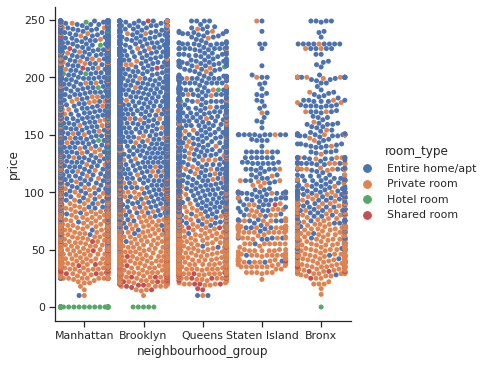

In [25]:
plott = sns.catplot(x='neighbourhood_group', y='price', hue='room_type', kind='swarm', data=df)
plott